# Lab 11: A/B Testing and Causality

## 1. Ramen Ratings
Ramen is delicious, it's a well known fact, and different countries around the world make theirs in unique ways. But is there one country that makes better ramen than another? In this assignment, we will take utilize A/B testing to answer this question

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 

If we take a look at our data, we see that we have different columns regarding brand, variety, the style of noodle, etc. But for this lab, we'll be focusing on the country and stars. Namely, we'll be only focusing two ramen countries, Malaysia and Taiwan

In [3]:
ramen_df = pd.read_csv('ramen-ratings.csv')
ramen_df


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


**Question 1**: Create a new data frame called `taiwan_and_malaysia` that only consists of data for countries Malaysia and Taiwan, and check the data type of the Stars column

In [4]:
taiwan_and_malaysia = ramen_df[ramen_df["Country"].isin(["Taiwan", "Malaysia"])]
taiwan_and_malaysia

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
28,2552,MyKuali,Penang White Curry Rice Vermicelli Soup,Bowl,Malaysia,5,NaN
40,2540,Wei Lih,GGE Noodle Snack Wheat Crackers Mexican Spicy,Pack,Taiwan,3.25,NaN
65,2515,Uni-President,Man Han Feast Spicy Beef Flavor Instant Noodles,Bowl,Taiwan,5,NaN
...,...,...,...,...,...,...,...
2500,80,Unif / Tung-I,Artificial Chicken,Pack,Taiwan,3.5,NaN
2512,68,Wei Lih,Jah Jan Mien Instant Noodle With Fried Soybean...,Pack,Taiwan,4,NaN
2522,58,Ve Wong,A-One Bun Tom Shrimp,Pack,Taiwan,3,NaN
2537,43,Kim Ve Wong,Jaopai Series: Vegetarian Instant Noodles,Bowl,Taiwan,0,NaN


**Question 2:** We see here that the data type of the Stars column is a little unexpected, so we should do three things:



1.   Sort the column to find any values that we may not want
2.   Remove those values if there are any
3.   Update the Sort column to contain float values using **astype()**





In [5]:
taiwan_and_malaysia = taiwan_and_malaysia.sort_values("Stars")
remove_unrated = taiwan_and_malaysia[taiwan_and_malaysia["Stars"] == "Unrated"].index
taiwan_and_malaysia.drop(remove_unrated, inplace=True)
taiwan_and_malaysia = taiwan_and_malaysia.astype({"Stars": float})
taiwan_and_malaysia['Stars'].describe()

count    379.000000
mean       3.865303
std        1.056701
min        0.000000
25%        3.500000
50%        4.000000
75%        5.000000
max        5.000000
Name: Stars, dtype: float64

Now that we've cleaned up our data set, we can know visualize the distribution of ramen ratings for Taiwan and Malaysia. The code below creates an overlapped histogram of our data, and we can see that the distrubution of data in Taiwan is slightly left than that of Malaysia. This can suggest that ramen and Taiwan is rated lower than ramen in Malaysia.

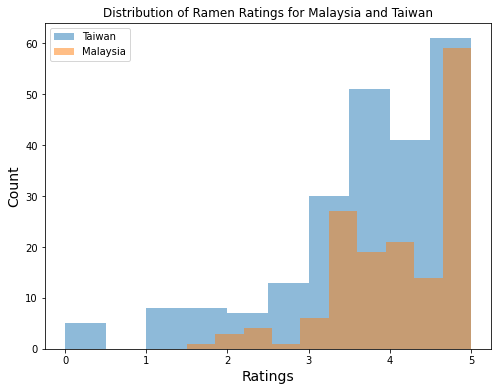

In [6]:
taiwan = []
malaysia = []
for index , row in taiwan_and_malaysia.iterrows():
  if row["Country"] == "Taiwan":
    taiwan.append(row["Stars"])
  else:
    malaysia.append(row["Stars"])

taiwan = np.array(taiwan)
malaysia = np.array(malaysia)
plt.figure(figsize=(8,6))
plt.hist(taiwan,bins=10,alpha=0.5,label="Taiwan")
plt.hist(malaysia,bins=10,alpha=0.5,label="Malaysia")
plt.xlabel("Ratings",size="14")
plt.ylabel("Count",size="14")
plt.title("Distribution of Ramen Ratings for Malaysia and Taiwan")
plt.legend(loc="upper left")
plt.show()

In order to do our A/B testing, we'll need to create our null and alternative and hypothesis. For all we know, the results shown in our histogram was simply chance, and does not reflect the population of Taiwanese and Malaysian ramen as whole:

**Null Hypothesis:** The distribution of ramen ratings is the same for both Taiwan and Malaysia. The difference in the data given to us is simply chance

**Alternative Hypothesis:** In population, ramen in Malaysia is rated higher than ramen Taiwan

Now, we can start our testing by only using the Country and Stars column, since that's all we'll be working with

**Question 3:** Create a new dataframe that consists of only the Country and Stars column

In [7]:
country_stars = taiwan_and_malaysia.filter(items=["Country", "Stars"])
country_stars

,Country,Stars
2287,Taiwan,0.00
707,Taiwan,0.00
2082,Taiwan,0.00
2537,Taiwan,0.00
2060,Taiwan,0.25
...,...,...
537,Malaysia,5.00
262,Taiwan,5.00
603,Malaysia,5.00
530,Malaysia,5.00


**Question 4:** Complete the function difference_of_rating_average which takes in a dataframe and an optional column name and returns the difference in stars average for Malaysia and Taiwan. Get the difference in average for the dataframe you made in question 3

**Note:** the parameter, `column_name="Country"` means that if no column name gets passed in when the function is called, it'll use the Country column by default

In [8]:
from statistics import mean 
def difference_of_rating_average(dataframe, column_name="Country"):
    taiwan = []
    malaysia = []
    for index , row in dataframe.iterrows():
        check = dataframe.loc[index, column_name]
        if check == "Taiwan":
            taiwan_star = dataframe.loc[index, "Stars"]
            taiwan.append(taiwan_star)
        elif check == "Malaysia":
            malaysia_star = dataframe.loc[index, "Stars"]
            malaysia.append(malaysia_star)
    return mean(malaysia) - mean(taiwan)
    
difference_of_rating_average(country_stars, column_name="Country")

0.4887917626728111

The function written in Question 4 will help us in creating our simulation. The code below creates one simulation by taking in the entire dataframe of taiwan and malaysia made in Question 1, and making a new data frame from just the Country and Stars columns. From there, it creates a copy of that modified dataframe and adds anouther column, Shuffle which consists of the Country column being put in a random order, and calls `difference_of_rating_average` with the column name being the Shuffle column. 

**You can call the function using the dataframe you made in Question 1**

In [9]:
def one_simulated_difference(table):
    table1 = pd.concat([table["Country"],table["Stars"]],axis=1,keys=['Country','Stars'])
    shuffled_labels = table1["Country"].sample(frac=1).values

    shuffled_table = table1
    shuffled_table["Shuffle"] = shuffled_labels
    return difference_of_rating_average(table1,"Shuffle")
one_simulated_difference(taiwan_and_malaysia)

0.16513536866359457

**Question 5**: Simulate running our single simulation function 100 times, store the results in an array, and plot the results using a histogram

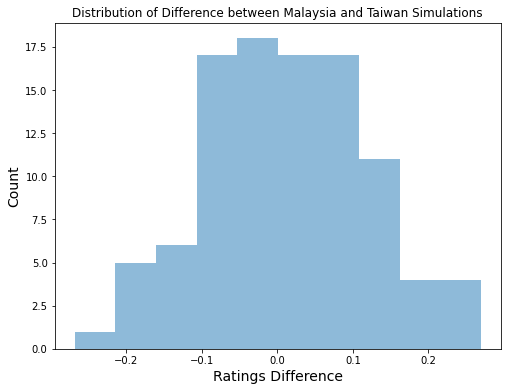

In [10]:
num_repetitions = 100
simulated_statistics = []
for i in np.arange(num_repetitions):
    simulated_statistics = np.append(simulated_statistics, one_simulated_difference(taiwan_and_malaysia))
plt.figure(figsize=(8,6))
plt.hist(simulated_statistics,bins=10,alpha=0.5)
plt.xlabel("Ratings Difference",size="14")
plt.ylabel("Count",size="14")
plt.title("Distribution of Difference between Malaysia and Taiwan Simulations")
plt.show()

**Question 6**: Based on the the histogram you made, which hypothesis does the data favor.

The data favors the null hypothesis as most of the ratings are centered between 0, -0.05, and 0.05. Since the original observed difference was 0.49 the alternative hypothesis holds slightly true. However, in the simulated statistics, this is not the case. The histogram favors the null hypothesis. 

## 2. Pokemon Strength

Pokemon has been one of the most popular trading card games since it's release in the 1990s. For this section, we'll take a look at pokemon data to see if having a secondary type causes Pokemon to have higher total stats


In [11]:
pokemon_df = pd.read_csv('Pokemon.csv')
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


**Question 1:** Create a new dataframe called `secondary_types` which consists of the the Type 2 and Total columns in pokemon_df, and update the Type 2 column such that rows with NaN will be set to 0 and rows without NaN will be set to 1. This will help us be able to see which pokemon have secondary types or not

In [12]:
secondary_types = pokemon_df.filter(items=["Type 2", "Total"])
indexes = secondary_types[secondary_types["Type 2"].isnull()].index
for index in indexes:
    secondary_types.loc[index, "Type 2"] = 0
for i in range(len(secondary_types)):
    if i not in indexes:
        secondary_types.loc[i, "Type 2"] = 1
secondary_types

,Type 2,Total
0,1,318
1,1,405
2,1,525
3,1,625
4,0,309
...,...,...
795,1,600
796,1,700
797,1,600
798,1,680


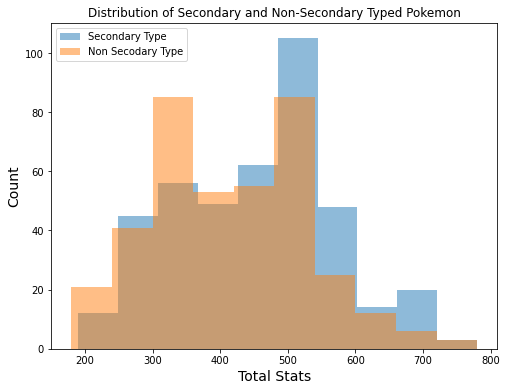

In [13]:
has_secondary = []
non_secondary = []

for index , row in secondary_types.iterrows():
    if row["Type 2"] == 0:
      non_secondary.append(row["Total"])
    else:
      has_secondary.append(row["Total"])

has_secondary = np.array(has_secondary)
non_secondary = np.array(non_secondary)

plt.figure(figsize=(8,6))
plt.hist(has_secondary,bins=10,alpha=0.5,label="Secondary Type")
plt.hist(non_secondary,bins=10,alpha=0.5,label="Non Secodary Type")
plt.xlabel("Total Stats",size="14")
plt.ylabel("Count",size="14")
plt.title("Distribution of Secondary and Non-Secondary Typed Pokemon")
plt.legend(loc="upper left")
plt.show()

We can see from this data that the non-secondary types are slightly left, which can indicate that not having a secondary type makes pokemon have less stats. But we can't jump to this conclusion without forming our hypotheses and creating a simulation

**Question:** What are our null and alternative hypotheses?

Null Hypothesis: The Total Stats distribution of Typed Pokemon is the same for both secondary and non-secondary typed pokemons. The difference in the data given to us is simply chance.

Alternative Hypthesis: Secondary Typed Pokemon have higher stats than non secondary typed pokemon. 

**Question 2:** Use the `secondary_types` dataframe you made to get the difference in mean total stats for Pokemon with and without a secondary type

In [14]:

def with_or_without_diff(dataframe, column_name="Type 2"):
    zero_cards = []
    one_cards = []
    for index, row in dataframe.iterrows():
        check = dataframe.loc[index, column_name]
        if check == 0:
            zero_card = dataframe.loc[index, "Total"]
            zero_cards.append(zero_card)
        elif check == 1:
            one_card = dataframe.loc[index, "Total"]
            one_cards.append(one_card)
    return mean(one_cards) - mean(zero_cards)
    
with_or_without_diff(secondary_types, column_name="Type 2")

44

**Question 3:** Complete the function `simulated_difference_poke` which takes in no parameters. It should:


1.   Create a copy of table1 with an extra column that holds the values in Type 2 shuffled in random order
2.   returns the difference in mean total stats for pokemon with an without a secondary type



In [15]:
def simulated_difference_poke():
    table1 = pd.concat([pokemon_df["Type 2"],pokemon_df['Total']], axis = 1, keys = ["Type 2","Total"])
    table1["Type 2"] = (table1['Type 2'].notnull()).astype('int')
    shuffled_table = table1
    shuffled_labels = table1["Type 2"].sample(frac=1).values
    shuffled_table["Shuffle"] = shuffled_labels
    return with_or_without_diff(shuffled_table, "Shuffle")

simulated_difference_poke()

-10

**Question 4:** Run your `simulated_difference_poke` code 1000 times and display the results using a histogram. If your code times out with 1000, feel free to use a smaller number like 500. You'll get a similar result either way.

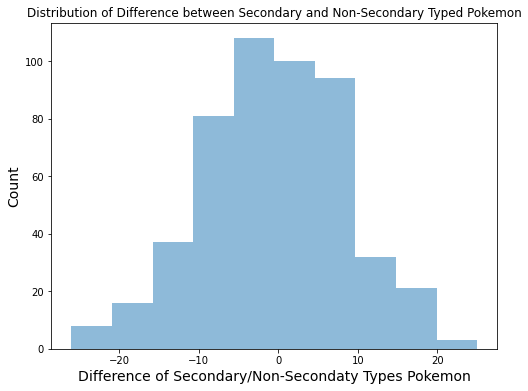

In [16]:
num_repetitions = 1000
simulated_statistics = []
for i in np.arange(num_repetitions):
    simulated_statistics = np.append(simulated_statistics, simulated_difference_poke())
plt.figure(figsize=(8,6))
plt.hist(simulated_statistics,bins=10,alpha=0.5)
plt.xlabel("Difference of Secondary/Non-Secondaty Types Pokemon",size="14")
plt.ylabel("Count",size="14")
plt.title("Distribution of Difference between Secondary and Non-Secondary Typed Pokemon")
plt.show()

**Question 5:** What can you conclude about this data? Is it safe to say that having a secondary type causes pokemon to have higher total stats? Why or why not? If we calculate our P value, what does the result say about our data?

Having a secondary type doesnt cause pokemon to have higher total stats, it's based on chance as more/most values are within the range -5 to 5.

In [24]:
poke_val = np.count_nonzero(simulated_statistics <= simulated_difference_poke())/1000
poke_val

0.25

The P-value is 0.25, thus none of the 1000 permuted samples resulted in a difference higher or lower than 0.5. Thus it is often by chance.